## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('bank_telemaketing.csv')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

In [5]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
## Target feature Visualization

In [7]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [8]:
# Converting target vairable from categorical to numerical
df['target']=np.where(df['y']=="yes",1,0)

In [9]:
df['target']

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: target, Length: 41188, dtype: int32

In [10]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [11]:
df=df.drop(columns='y')

In [12]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [13]:
## Defining the IV and DV

In [14]:
x= df.drop(columns='target')
y=df['target']

In [15]:
x.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [17]:
# Mean of the entire taregt

y.mean()

0.11265417111780131

In [18]:
## Split features into Numerical and Categorical

In [19]:
num=x.select_dtypes(include="number")
char=x.select_dtypes(include="object")

In [20]:
num.dtypes

age                 int64
duration            int64
campaign            int64
pdays               int64
previous            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [21]:
# Checking the unique values in very column

def unique_levels(x):
    x=x.value_counts().count()
    return(x)
df_value_counts=pd.DataFrame(num.apply(lambda x : unique_levels(x)))
df_value_counts

,0
age,78
duration,1544
campaign,42
pdays,27
previous,8
emp.var.rate,10
cons.price.idx,26
cons.conf.idx,26
euribor3m,316
nr.employed,11


In [22]:
df_value_counts.columns=['feature_levels']
df_value_counts

,feature_levels
age,78
duration,1544
campaign,42
pdays,27
previous,8
emp.var.rate,10
cons.price.idx,26
cons.conf.idx,26
euribor3m,316
nr.employed,11


In [23]:
slice1=df_value_counts.loc[df_value_counts['feature_levels']<=20]
cat_list=slice1.index
cat=num.loc[:,cat_list]
cat.dtypes

previous          int64
emp.var.rate    float64
nr.employed     float64
dtype: object

In [24]:
cat.head()

,previous,emp.var.rate,nr.employed
0,0,1.1,5191.0
1,0,1.1,5191.0
2,0,1.1,5191.0
3,0,1.1,5191.0
4,0,1.1,5191.0


In [25]:
slice2=df_value_counts.loc[df_value_counts['feature_levels']>20]
num_list=slice2.index
num=num.loc[:,num_list]

In [26]:
num.head()

,age,duration,campaign,pdays,cons.price.idx,cons.conf.idx,euribor3m
0,56,261,1,999,93.994,-36.4,4.857
1,57,149,1,999,93.994,-36.4,4.857
2,37,226,1,999,93.994,-36.4,4.857
3,40,151,1,999,93.994,-36.4,4.857
4,56,307,1,999,93.994,-36.4,4.857


In [27]:
### putting all numerical things which don't have many unique values into a categorical values;

In [28]:
char=pd.concat([char,cat],axis=1,join="inner")

In [29]:
char.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,previous,emp.var.rate,nr.employed
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,0,1.1,5191.0
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,0,1.1,5191.0
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,0,1.1,5191.0
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,0,1.1,5191.0
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,0,1.1,5191.0


In [30]:
## Outlier Analysis of Numerical Features

In [31]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,age,duration,campaign,pdays,cons.price.idx,cons.conf.idx,euribor3m
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,93.575664,-40.502600,3.621291
std,10.42125,259.279249,2.770014,186.910907,0.578840,4.628198,1.734447
min,17.00000,0.000000,1.000000,0.000000,92.201000,-50.800000,0.634000
1%,23.00000,11.000000,1.000000,3.000000,92.201000,-49.500000,0.658480
5%,26.00000,36.000000,1.000000,999.000000,92.713000,-47.100000,0.797000
10%,28.00000,59.000000,1.000000,999.000000,92.893000,-46.200000,1.046000
25%,32.00000,102.000000,1.000000,999.000000,93.075000,-42.700000,1.344000
50%,38.00000,180.000000,2.000000,999.000000,93.749000,-41.800000,4.857000
75%,47.00000,319.000000,3.000000,999.000000,93.994000,-36.400000,4.961000


In [32]:
# Capping and Flooring of outliers

In [33]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [34]:
num=num.apply(lambda x : outlier_cap(x))

In [35]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,age,duration,campaign,pdays,cons.price.idx,cons.conf.idx,euribor3m
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,39.976644,254.379784,2.500024,962.479290,93.574052,-40.495137,3.621394
std,10.138262,235.184174,2.301191,186.891194,0.576030,4.612905,1.734194
min,23.000000,11.000000,1.000000,3.000000,92.201000,-49.500000,0.658480
1%,23.000000,11.000000,1.000000,3.000000,92.201000,-49.500000,0.658932
5%,26.000000,36.000000,1.000000,999.000000,92.713000,-47.100000,0.797000
10%,28.000000,59.000000,1.000000,999.000000,92.893000,-46.200000,1.046000
25%,32.000000,102.000000,1.000000,999.000000,93.075000,-42.700000,1.344000
50%,38.000000,180.000000,2.000000,999.000000,93.749000,-41.800000,4.857000
75%,47.000000,319.000000,3.000000,999.000000,93.994000,-36.400000,4.961000


In [36]:
# Missing value treatment
num.isnull().sum()

age               0
duration          0
campaign          0
pdays             0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
dtype: int64

In [37]:
char.isnull().sum()

job             0
marital         0
education       0
default         0
housing         0
loan            0
contact         0
month           0
day_of_week     0
poutcome        0
previous        0
emp.var.rate    0
nr.employed     0
dtype: int64

In [38]:
# Since the data does not contain any missing values Imputation Processes are not required
# In case there are missing values in the data, then please remove those columns or features that have more than 25% of rows as missing
# X = X.loc[:, X.isnull().mean() <= .25]

# Feature Selection - Numerical Features

# Part 1 : Remove Features with 0 Variance

as these are constant data and provide no valuable input

In [39]:
from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]

In [40]:
num_1.iloc[0]

age                56.000
duration          261.000
campaign            1.000
pdays             999.000
cons.price.idx     93.994
cons.conf.idx     -36.400
euribor3m           4.857
Name: 0, dtype: float64

# Part 2 - Bi Variate Analysis (Feature Discretization)

In [41]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_1),index=num_1.index, columns=num_1.columns).add_suffix('_Rank')
num_binned.head()

,age_Rank,duration_Rank,campaign_Rank,pdays_Rank,cons.price.idx_Rank,cons.conf.idx_Rank,euribor3m_Rank
0,9.0,6.0,0.0,0.0,6.0,6.0,5.0
1,9.0,4.0,0.0,0.0,6.0,6.0,5.0
2,4.0,6.0,0.0,0.0,6.0,6.0,5.0
3,5.0,4.0,0.0,0.0,6.0,6.0,5.0
4,9.0,7.0,0.0,0.0,6.0,6.0,5.0


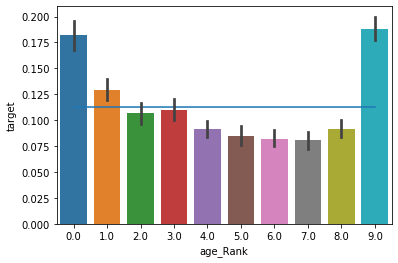

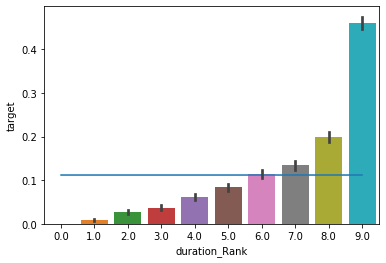

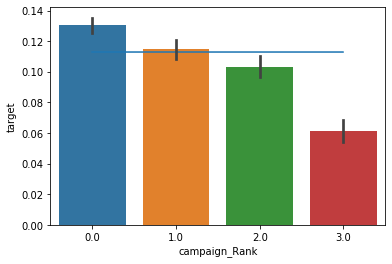

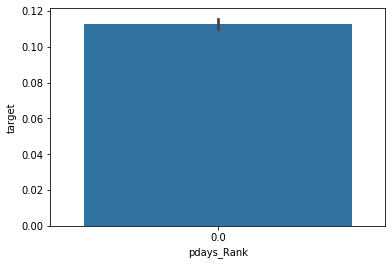

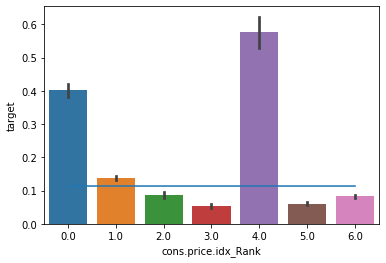

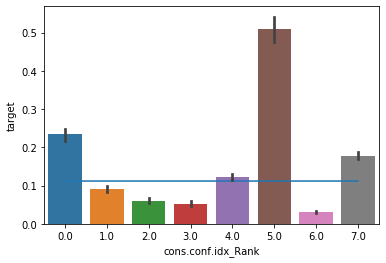

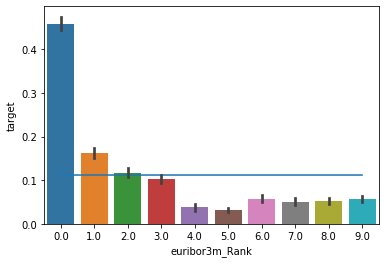

In [42]:
#Check if the features show a slope at all
#If they do, then do you see some deciles below the population average and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor


x_bin_combined=pd.concat([y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col,y=x_bin_combined['target'].mean(),data=x_bin_combined)
    sns.barplot(x=col, y="target",data=x_bin_combined, estimator=mean )
plt.show()

In [43]:
#df['pdays_rank']=pd.qcut(df['pdays'].rank(method='first').values,5,duplicates='drop').codes+1
#from numpy import mean
#ax = sns.barplot(x="pdays_rank", y="target", data=df, estimator=mean)

In [44]:
num_1=num_1.drop(['age','pdays'],axis=1)

In [45]:
# All features from num_1 will get selected due to good discrimination power by all of them
select_features_df_num=num_1

In [46]:
select_features_df_num.shape

(41188, 5)

## Feature Selection - Categorical Features
## Part 1 - Bi Variate Analysis

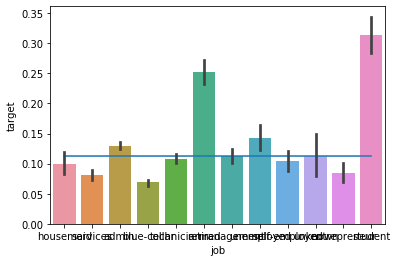

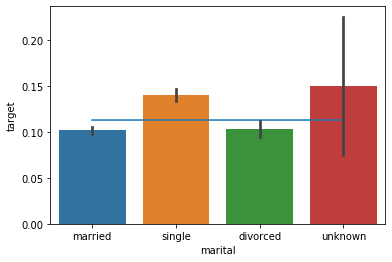

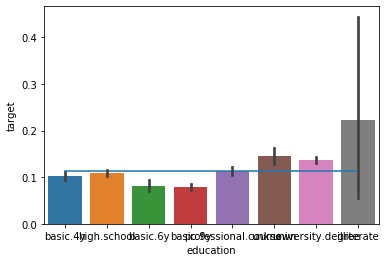

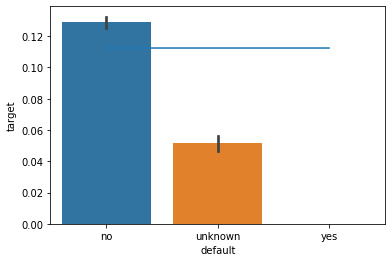

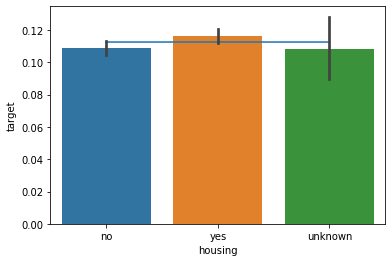

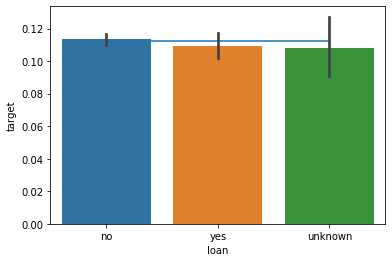

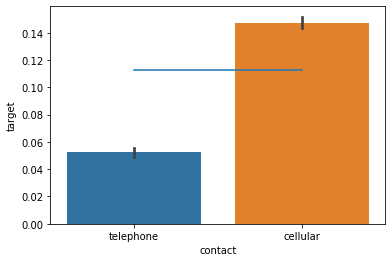

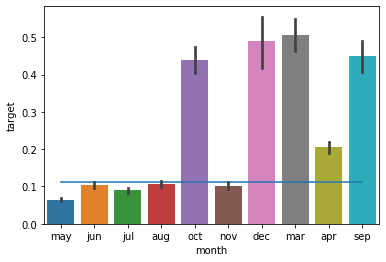

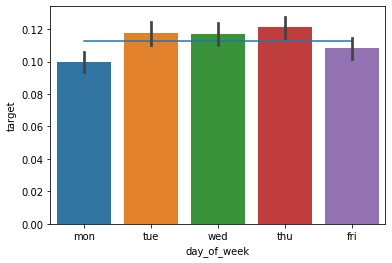

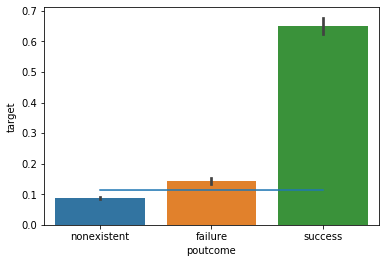

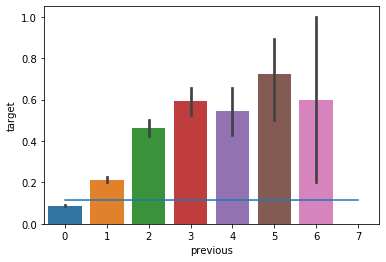

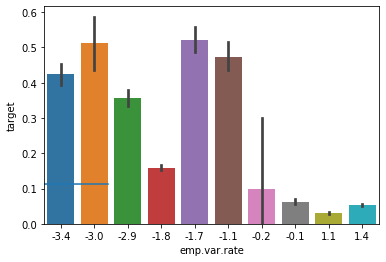

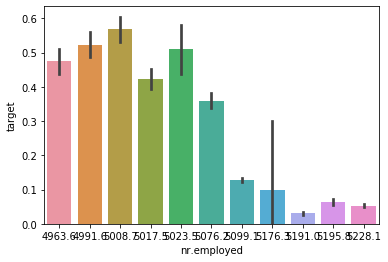

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([y,char],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.lineplot(x=col,y=X_char_merged['target'].mean(),data=X_char_merged)
    sns.barplot(x=col, y="target",data=X_char_merged, estimator=mean )
plt.show()

In [48]:
char=char.drop(['housing','education','marital','loan','day_of_week'],axis=1)

In [49]:
char['default']=np.where(char['default'] =='unknown', 'yes', char['default'])
#char['previous_ind']=np.where(char['previous'] >0, 1, 0) (try  this option to see the impact on the model)
#char=char.drop(['previous'],drop=1)

In [50]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum.shape

(41188, 27)

## Part 2 - Select K Best

## Select K Best for Categorical Features
<b>
from sklearn.feature_selection import SelectKBest, chi2 selector = SelectKBest(chi2, k=25) selector.fit_transform(X_char_dum, Y)
<br>
Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True) select_features_df_char = X_char_dum.iloc[:,cols]

In [51]:
select_features_df_char=X_char_dum

# Creating the Master Feature Set for Model Development

In [52]:
X_all=pd.concat([select_features_df_char,select_features_df_num],axis=1,join="inner")

In [53]:
X_all.shape

(41188, 32)

# Train Test Split

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X_all, y, test_size=0.3, random_state=10)

In [55]:
print("Shape of Training Data",x_train.shape)
print("Shape of Testing Data",x_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (28831, 32)
Shape of Testing Data (12357, 32)
Response Rate in Training Data 0.11161596892234053
Response Rate in Testing Data 0.11507647487254188


# Model Building Step

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [57]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=6,min_samples_split=500)
gbm.fit(x_train,y_train)
print_score(gbm, x_train, y_train, x_test, y_test, train=True)
print_score(gbm, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 93.14%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.952728     0.727539  0.931428      0.840133      0.927593
recall         0.970991     0.616532  0.931428      0.793762      0.931428
f1-score       0.961773     0.667452  0.931428      0.814612      0.928922
support    25613.000000  3218.000000  0.931428  28831.000000  28831.000000
_______________________________________________
Confusion Matrix: 
 [[24870   743]
 [ 1234  1984]]

Test Result:
Accuracy Score: 91.47%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.940055     0.662832  0.914704      0.801444      0.908153
recall         0.965158     0.526723  0.914704      0.745940      0.914704
f1-score       0.952441     0.586991  0.914704      0.769716      0.910386
support   

In [58]:
import pandas as pd
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                 index=x_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
duration,0.458785
nr.employed,0.307280
euribor3m,0.084554
poutcome_success,0.043614
cons.conf.idx,0.033919
month_oct,0.013010
campaign,0.007605
cons.price.idx,0.006704
contact_telephone,0.006633
month_mar,0.006267


# # Gains Chart Analysis
# This will help understand the power of discrimination offered by the model's estimated probabilities

#### GBM

In [60]:
y_pred_prob = gbm.predict_proba(X_all)[:, 1]
df['pred_prob_gbm']=pd.DataFrame(y_pred_prob)
df['P_Rank_GBM']=pd.qcut(df['pred_prob_gbm'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_GBM')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_GBM')['pred_prob_gbm'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_GBM',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_GBM,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,4119,0.694101,0.671075,2859.0,2859.0,0.616164,0.616164,1260.0,1260.0,0.034475,0.034475,0.5817,0.100005,0.100005,1
1,9,4119,0.310998,0.311226,1281.0,4140.0,0.276078,0.892241,2838.0,4098.0,0.077651,0.112127,0.7801,0.100005,0.200010,2
2,8,4119,0.096625,0.088803,398.0,4538.0,0.085776,0.978017,3721.0,7819.0,0.101811,0.213938,0.7641,0.100005,0.300015,3
3,7,4118,0.020155,0.019547,83.0,4621.0,0.017888,0.995905,4035.0,11854.0,0.110403,0.324341,0.6716,0.099981,0.399995,4
4,6,4119,0.003156,0.007389,13.0,4634.0,0.002802,0.998707,4106.0,15960.0,0.112345,0.436686,0.5620,0.100005,0.500000,5
5,5,4119,0.001214,0.004121,5.0,4639.0,0.001078,0.999784,4114.0,20074.0,0.112564,0.549250,0.4505,0.100005,0.600005,6
6,4,4118,0.000000,0.002805,0.0,4639.0,0.000000,0.999784,4118.0,24192.0,0.112674,0.661924,0.3379,0.099981,0.699985,7
7,3,4119,0.000243,0.002358,1.0,4640.0,0.000216,1.000000,4118.0,28310.0,0.112674,0.774598,0.2254,0.100005,0.799990,8
8,2,4119,0.000000,0.001984,0.0,4640.0,0.000000,1.000000,4119.0,32429.0,0.112701,0.887299,0.1127,0.100005,0.899995,9
9,1,4119,0.000000,0.001290,0.0,4640.0,0.000000,1.000000,4119.0,36548.0,0.112701,1.000000,0.0000,0.100005,1.000000,10


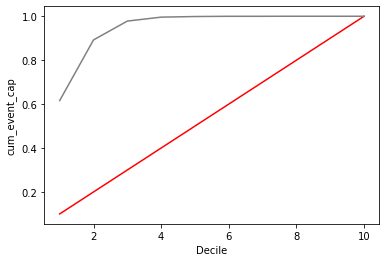

In [62]:
ax = sns.lineplot( x="Decile", y="cum_random_cap", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=sorted_reindexed,color='grey')

In [63]:
df['Predicted_Response_Rank']=np.where(df['P_Rank_GBM']>8,"Top 2","Bottom 8")

In [64]:
df.groupby('Predicted_Response_Rank')['target'].agg(['mean'])

,mean
Predicted_Response_Rank,
Bottom 8,0.015175
Top 2,0.502549


In [65]:
df['Duration_Rank']=pd.qcut(df['duration'].rank(method='first').values,10,duplicates='drop').codes+1

In [66]:
df.groupby('Duration_Rank')['duration'].agg(['min','mean','max'])

,min,mean,max
Duration_Rank,,,
1,0,34.379947,59
2,59,74.382617,89
3,89,102.283321,116
4,116,130.867654,146
5,146,162.387958,180
6,180,199.750182,222
7,222,248.925692,280
8,280,320.676863,368
9,368,445.551833,551


In [67]:
df['duration'].mean()

258.2850101971448

In [68]:
df['duration_segment']=np.where(df['Duration_Rank']>7,"High Duration","Low Duration")
df.duration_segment.value_counts()

Low Duration     28831
High Duration    12357
Name: duration_segment, dtype: int64

In [69]:
pd.crosstab(index=df['duration_segment'], columns=df['Predicted_Response_Rank'],values=df['Predicted_Response_Rank'],aggfunc='count')

Predicted_Response_Rank,Bottom 8,Top 2
duration_segment,,
High Duration,6517,5840
Low Duration,26433,2398


###### Recommendations ##########
# Phase 1 - Speak to customers who falls in top 2 predicted ranks(deciles) and also are in High Duration segment
# Similarly - Phase 2 ( Top 2 , Low Duration)
# Phase 3 - Bottom 7 and High Duration (randomly select 25% of them only)